# **Hand Written Digit Prediction - Classification Analysis**

# **Objective**

The digits consists of 8x8 pixel images of digits. The images attribute of the datasets stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

# **Import** **Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import** **Data**

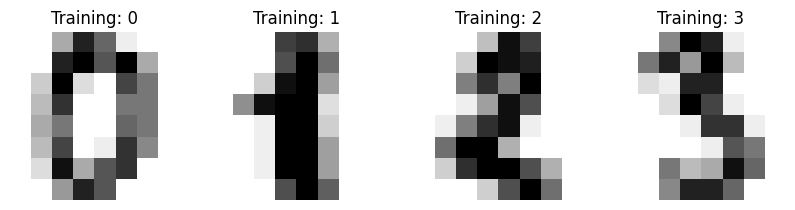

In [5]:
from sklearn.datasets import load_digits

df = load_digits()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes.ravel(), df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

plt.show()

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [33]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

# **Scaling** **Image** **Data**

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data = data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train** **Test** **Split** **Data**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# **Predict Test Data**

In [28]:
y_pred = rf.predict(x_test)

In [29]:
y_pred

array([5, 8, 3, 0, 8, 9, 8, 7, 5, 7, 9, 2, 7, 9, 5, 1, 7, 8, 1, 1, 6, 3,
       1, 9, 0, 5, 2, 6, 8, 0, 3, 3, 3, 4, 7, 1, 2, 7, 5, 6, 2, 5, 7, 0,
       3, 0, 9, 6, 4, 2, 6, 9, 9, 2, 5, 6, 4, 5, 1, 1, 9, 2, 0, 0, 6, 7,
       6, 4, 9, 1, 5, 0, 5, 5, 8, 2, 2, 0, 2, 7, 6, 3, 5, 6, 3, 5, 3, 9,
       4, 1, 9, 4, 6, 3, 8, 6, 4, 0, 2, 3, 2, 8, 1, 7, 1, 1, 4, 7, 0, 8,
       1, 7, 1, 2, 2, 6, 8, 0, 3, 3, 7, 6, 3, 3, 9, 7, 2, 3, 3, 6, 0, 5,
       1, 4, 7, 9, 8, 7, 4, 4, 0, 0, 9, 2, 1, 3, 4, 6, 9, 6, 2, 4, 6, 6,
       0, 0, 7, 9, 8, 2, 8, 7, 6, 8, 7, 4, 5, 0, 0, 0, 6, 3, 6, 9, 0, 5,
       1, 3, 4, 7, 1, 6, 6, 7, 9, 2, 5, 2, 9, 2, 3, 4, 8, 0, 9, 0, 0, 6,
       4, 6, 3, 3, 0, 6, 7, 9, 1, 0, 0, 0, 8, 3, 9, 6, 2, 7, 7, 6, 0, 6,
       0, 3, 7, 3, 4, 6, 3, 2, 7, 9, 6, 2, 0, 3, 9, 0, 3, 9, 7, 1, 6, 3,
       0, 8, 7, 6, 7, 3, 3, 0, 8, 5, 4, 9, 5, 3, 7, 8, 0, 4, 3, 3, 8, 7,
       0, 7, 2, 6, 8, 6, 0, 5, 7, 4, 7, 1, 6, 4, 6, 9, 8, 8, 4, 4, 2, 4,
       1, 6, 7, 9, 5, 8, 0, 3, 7, 4, 4, 0, 4, 6, 6,

# **Model Accuracy**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test, y_pred)

array([[57,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 68,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 48,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0, 53]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.93      1.00      0.97        43
           2       1.00      0.98      0.99        56
           3       1.00      0.97      0.99        70
           4       1.00      1.00      1.00        53
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        58
           7       0.94      0.98      0.96        48
           8       0.96      0.92      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# **Explaination**

This code performs handwritten digit classification using the digits dataset and a Random Forest classifier. First, necessary libraries are imported, including pandas, numpy, matplotlib, and sklearn. The load_digits function from sklearn.datasets is used to load the dataset, which contains images of handwritten digits (0-9) in an 8x8 pixel format. To understand the data, a few sample images are visualized using matplotlib, where each image is displayed with its corresponding label. Then, the images are reshaped from their 8x8 format into 1D arrays of 64 features, effectively "flattening" them, making it suitable for input into a machine learning model.

Next, the data is normalized by dividing all pixel values by 16, scaling them to a range between 0 and 1, which often helps improve model performance. The dataset is then split into training (70%) and testing (30%) sets using train_test_split to evaluate the model's ability to generalize to unseen data. A Random Forest classifier is instantiated and trained on the training set. Once trained, predictions are made on the test set, and the results are evaluated using a confusion matrix and classification report. The confusion matrix provides insights into where the model misclassifies, while the classification report gives a breakdown of precision, recall, and F1-score for each digit class, allowing us to assess the model's overall accuracy and performance. This process demonstrates the full workflow for a classification task, from data preparation and visualization to model training, prediction, and performance evaluation.